In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### 1. Dataset
Load the prostate dataset. 

In [4]:
train = pd.read_csv('data/prostate_train.csv')  
test = pd.read_csv('data/prostate_test.csv')  

#print(train.shape, train.columns)
#print(test.shape, test.columns)

In [5]:
Xtrain, ytrain = train.drop(columns=['lpsa']), train['lpsa']
Xtest, ytest = test.drop(columns=['lpsa']), test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

In [4]:
def plot_lambda_coefficients(model, Xtrain, ytrain):
    """ Plots the coefficients of a regression model, 
        depending on the value of regularization parameter lambda"""
    
    lambdas = np.logspace(-5, 5, 200)
    params = [None for _ in range(len(lambdas))]

    for i, lambda_ in enumerate(lambdas):
        model.set_params(alpha=lambda_)
        model.fit(Xtrain, ytrain)
        params[i] = model.coef_

    # Plot coefficients with varying lambda
    plt.figure(figsize=(20, 6))
    plt.subplot(121)
    ax = plt.gca()
    ax.plot(lambdas, params)
    ax.set_xscale("log")
    plt.xlabel("lambda")
    plt.ylabel("ridge coefficients")
    plt.title("Ridge coefficients for the prostate dataset, as a function of lambda")
    plt.axis("tight") 
    plt.show()

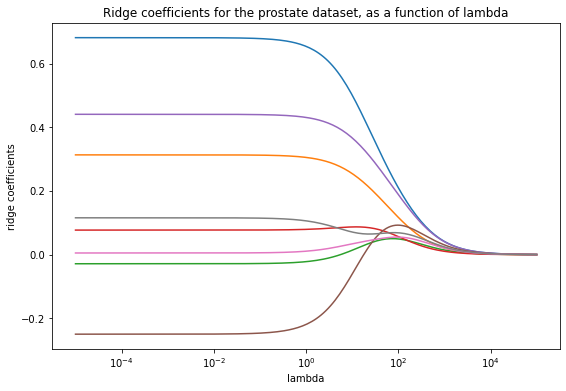

In [5]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge() 
ridge.fit(Xtrain, ytrain) 

plot_lambda_coefficients(ridge, Xtrain, ytrain)

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [6]:
def cross_validate_lambda(model, lambdas, Xtrain, ytrain):
    """Performs cross validation for a regression model,
       once for each regularization parameter lambda"""
    
    mse_trn = [0 for _ in range(len(lambdas))]
    mse_tst = [0 for _ in range(len(lambdas))]
    
    # Consider different regularization parameters lambda
    for l_i, lambda_ in enumerate(lambdas):

        model.set_params(alpha=lambda_) 

        split_mse_trn = [0 for _ in range(folds)]
        split_mse_tst = [0 for _ in range(folds)]


        # Consider all data splits into k folds, compute train, test MSE
        for split_i, (split_trn, split_tst) in enumerate(kf.split(Xtrain)):
 
            
            Xtrn, ytrn = Xtrain.iloc[split_trn], ytrain[split_trn]   
            Xtst, ytst = Xtrain.iloc[split_tst], ytrain[split_tst]  

            # Regression on this split
            model.fit(Xtrn, ytrn)

            # Train, Test MSE for this split
            ypred_trn = model.predict(Xtrn)
            ypred_tst = model.predict(Xtst) 
            
            split_mse_trn[split_i] =  ((ytrn - ypred_trn)** 2).sum() / len(ytrn) 
            split_mse_tst[split_i] =  ((ytst - ypred_tst)** 2).sum() / len(ytst) 
        
        # Average MSE over all splits
        mse_trn[l_i] = sum(split_mse_trn) / folds
        mse_tst[l_i] = sum(split_mse_tst) / folds
        
        if l_i%20 ==0:
            print(f"It. {str(l_i)} train, test MSE :", round(mse_trn[l_i], 2), round(mse_tst[l_i], 2)) 
    
    # Minimal MSE over all lambda
    min_mse_trn = min(mse_trn)
    min_mse_tst = min(mse_tst) 
    min_index = mse_tst.index(min_mse_tst)
    
    # Optimal lambda (w.r.t. average MSE over all cross validation splits)
    lambda_ = lambdas[min_index]
    
    return min_mse_trn, min_mse_tst, lambda_

In [7]:
from sklearn.model_selection import KFold

# K-fold cross validation
folds = 10
kf = KFold(n_splits=folds, shuffle=False)

# Ridge regression with varying lambda and on different splits of the training set
lambdas = np.logspace(-5, 5, 200)
ridge = Ridge() 

min_mse_trn, min_mse_tst, ridge_lambda = cross_validate_lambda(ridge, lambdas, Xtrain, ytrain)

It. 0 train, test MSE : 0.46 0.76
It. 20 train, test MSE : 0.46 0.76
It. 40 train, test MSE : 0.46 0.76
It. 60 train, test MSE : 0.46 0.76
It. 80 train, test MSE : 0.46 0.76
It. 100 train, test MSE : 0.46 0.76
It. 120 train, test MSE : 0.49 0.77
It. 140 train, test MSE : 0.69 0.94
It. 160 train, test MSE : 1.12 1.34
It. 180 train, test MSE : 1.27 1.48


Report train and test error measured in MSE for this $\lambda$.

In [10]:
print("Optimal lambda: ", round(ridge_lambda, 2)) 
print(f"Test, train MSE, averaged over {folds} folds:", round(min_mse_tst,2), round(min_mse_trn,2))

Optimal lambda:  3.37
Test, train MSE, averaged over 10 folds: 0.76 0.46


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

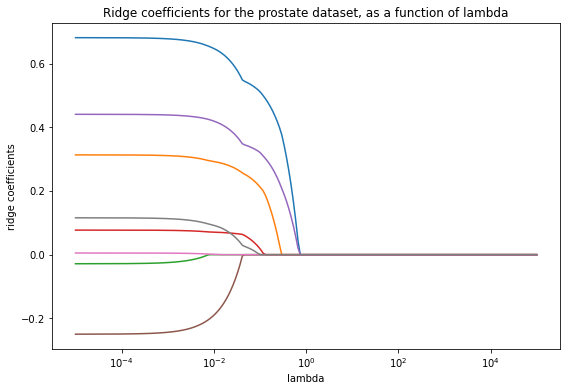

In [11]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error

# Lasso regression
lasso = Lasso() 
lasso.fit(Xtrain, ytrain)

plot_lambda_coefficients(lasso, Xtrain, ytrain)

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [12]:
from sklearn.model_selection import KFold

# K-fold cross validation
folds = 10
kf = KFold(n_splits=folds, shuffle=False)

# Ridge regression with varying lambda and on different training splits
lambdas = np.logspace(-5, 5, 200)
model = Lasso() 
min_mse_trn, min_mse_tst, lasso_lambda = cross_validate_lambda(model, lambdas, Xtrain, ytrain)

It. 0 train, test MSE : 0.46 0.76
It. 20 train, test MSE : 0.46 0.76
It. 40 train, test MSE : 0.46 0.76
It. 60 train, test MSE : 0.46 0.75
It. 80 train, test MSE : 0.52 0.78
It. 100 train, test MSE : 1.29 1.5
It. 120 train, test MSE : 1.29 1.5
It. 140 train, test MSE : 1.29 1.5
It. 160 train, test MSE : 1.29 1.5
It. 180 train, test MSE : 1.29 1.5


In [13]:
print("Optimal lambda: ", round(lasso_lambda, 2)) 
print(f"Test, train MSE, averaged over {folds} folds:", round(min_mse_tst,2), round(min_mse_trn,2))

Optimal lambda:  0.02
Test, train MSE, averaged over 10 folds: 0.75 0.46


How many and which features are used?
		Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

In [14]:
#Perform Regression on the original data with the optimal lambda, and look at resulting coefficients

# - for comparison, OLS:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)
linreg_params = linreg.coef_

# - Ridge
ridge.set_params(alpha=ridge_lambda)
ridge.fit(Xtrain, ytrain)
ridge_params = ridge.coef_

# - Lasso
lasso.set_params(alpha=lasso_lambda)
lasso.fit(Xtrain, ytrain)
lasso_params = lasso.coef_

print("Parameters in OLS:", [round(p, 2) for p in linreg_params])

print("\nParameters in Ridge:", [round(p, 2) for p in ridge_params])
print("Features used in Ridge:", [Xtrain.columns[i] for i in range(len(ridge_params)) if ridge_params[i] != 0])
print("\nParameters in Lasso:", [round(p, 2) for p in lasso_params])
print("Features used in Lasso:", [Xtrain.columns[i] for i in range(len(lasso_params)) if lasso_params[i] != 0])

Parameters in OLS: [0.68, 0.31, -0.03, 0.08, 0.44, -0.25, 0.01, 0.12]

Parameters in Ridge: [0.6, 0.29, -0.01, 0.08, 0.41, -0.16, 0.02, 0.09]
Features used in Ridge: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

Parameters in Lasso: [0.62, 0.28, 0.0, 0.07, 0.4, -0.14, 0.0, 0.08]
Features used in Lasso: ['lcavol', 'lweight', 'lbph', 'svi', 'lcp', 'pgg45']


Compared to OLS regression, Ridge regression constrains the parameter values, but also uses all given features for prediction. 

Lasso regression constrains the parameter values and additionally sets some parameters to zero, such that the corresponding features are not used for prediction anymore.